In [2]:
import os
import yfinance as yf
import pandas as pd
import numpy as np
#print(os.getcwd())

/Users/sinazabanfahm/FinAT/Strats


In [3]:
os.chdir('..')

In [4]:
from utils.time_series import BasicTSTransformer,Indicators


In [18]:
ticker = yf.Ticker('AMZN')
df = ticker.history('5y')

In [28]:
es_2 = Ind.smoothed_rsi(ts_rets, 2)[30:] 
es_5 = Ind.smoothed_rsi(ts_rets, 5)[30:] - 50
es_10 = Ind.smoothed_rsi(ts_rets, 10)[30:] - 50
es_20 = Ind.smoothed_rsi(ts_rets, 20)[30:]- 50
es_30 = Ind.smoothed_rsi(ts_rets, 30)[30:] - 50
prices = df['Close']


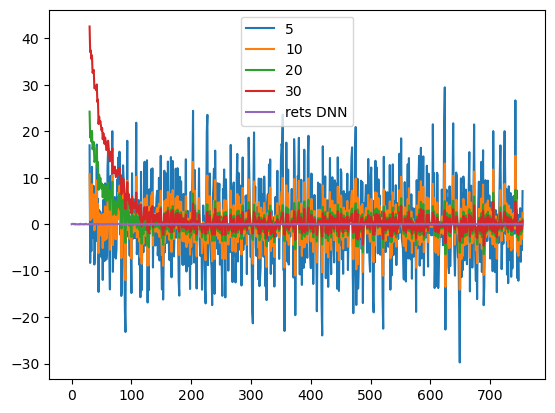

In [29]:
import matplotlib.pyplot as plt
plt.plot(es_5,label = "5")
plt.plot(es_10, label = "10")
plt.plot(es_20, label = '20')
plt.plot(es_30,label = '30')
plt.plot(ts_rets, label = "rets ")
plt.legend()
plt.show()



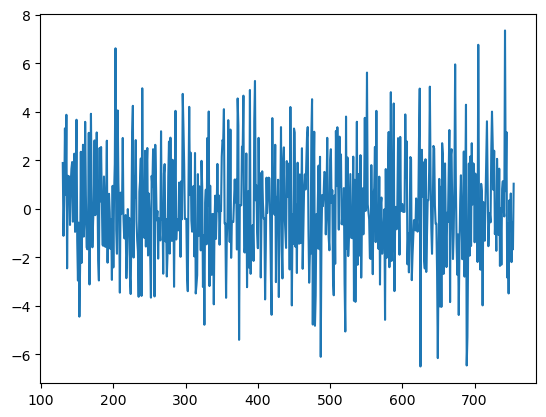

In [21]:
plt.plot(es_20[100:], label = '20')


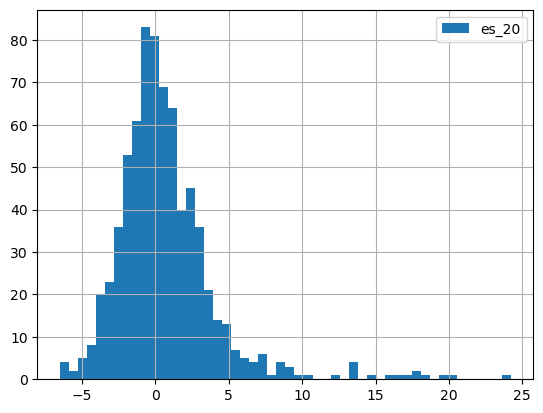

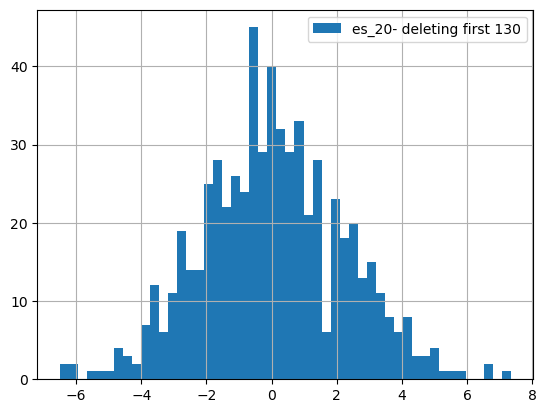

In [22]:
#Essentially we should get rid of the first 100: Distribution is not normal
es_20.hist(bins = 50, label = "es_20")
plt.legend()
plt.show()
es_20[100:].hist(bins = 50, label = "es_20- deleting first 130")
plt.legend()
plt.show()

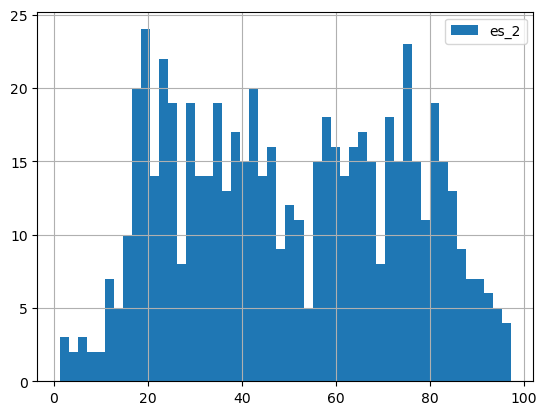

In [23]:
es_2[100:].hist(bins = 50, label = "es_2")
plt.legend()
plt.show()


In [24]:
#Distribution is not normal - following transformation makes it normal - it is inverse logistic composed with some
#normalization
import numpy as np
es_2_transformed = - np.log(2/(1 + 0.0099* (2*es_2 -100))-1)

In [25]:
X = es_20[100:]
y = es_2_transformed[100:]
prices = prices[100:]

In [26]:
import torch
import torch.nn as nn
X = torch.tensor(np.array(X), dtype = torch.float32)
y = torch.tensor(np.array(y), dtype = torch.float32)
print(X.shape, y.shape)

torch.Size([625]) torch.Size([625])
